In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler
import xgboost as xgb

In [58]:
df=pd.read_csv(r'C:\Users\Gabi\Desktop\fashion-mnist_train.csv')
df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
X_train = df.drop('label',axis=1)
y_train = df['label']

In [60]:
s = df['label']
s.value_counts()

9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
Name: label, dtype: int64

In [61]:
df['pixel10'].value_counts()

0      45168
1       1602
2        944
3        481
4        290
       ...  
249        1
233        1
239        1
238        1
251        1
Name: pixel10, Length: 252, dtype: int64

In [62]:
pca = PCA()
X2D = pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [63]:
pca.explained_variance_ratio_


array([2.90113534e-01, 1.77276684e-01, 6.02269951e-02, 4.97027175e-02,
       3.83928870e-02, 3.47099665e-02, 2.34404392e-02, 1.91393731e-02,
       1.34360546e-02, 1.31072469e-02, 9.89790058e-03, 9.14050194e-03,
       7.65205926e-03, 6.60426603e-03, 6.09188058e-03, 5.91505566e-03,
       5.52045752e-03, 5.30489975e-03, 4.59958513e-03, 4.55534456e-03,
       4.32822772e-03, 4.06102821e-03, 3.83469449e-03, 3.74220867e-03,
       3.61876698e-03, 3.50909656e-03, 3.33585882e-03, 3.18695876e-03,
       3.09618851e-03, 2.95278348e-03, 2.76008367e-03, 2.65339233e-03,
       2.62962261e-03, 2.57680000e-03, 2.47560374e-03, 2.38412925e-03,
       2.30074999e-03, 2.24349468e-03, 2.19127657e-03, 2.09739139e-03,
       2.00785598e-03, 1.97571699e-03, 1.94213649e-03, 1.83775815e-03,
       1.75781769e-03, 1.71549532e-03, 1.68051284e-03, 1.63923957e-03,
       1.62220887e-03, 1.56038698e-03, 1.53962495e-03, 1.50808666e-03,
       1.47631924e-03, 1.42855370e-03, 1.38375454e-03, 1.37028358e-03,
      

In [64]:
d

187

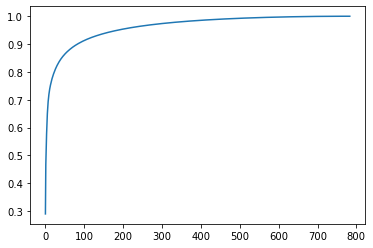

In [65]:
plt.plot(cumsum)

In [66]:
from sklearn.decomposition import IncrementalPCA
n_batches = 40
inc_pca = IncrementalPCA(n_components=187)
for X_batch in np.array_split(X_train, n_batches):
    inc_pca.partial_fit(X_batch)

X_train = inc_pca.transform(X_train)


In [67]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

In [68]:
xgb_reg = xgb.XGBClassifier(eval_metric = 'mlogloss')
xgb_reg.fit(X_train, y_train)

C:\Users\Gabi\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='mlogloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [69]:
dfRes=pd.read_csv(r'C:\Users\Gabi\Desktop\fashion-mnist_test.csv')
dfRes

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [70]:
X_test = dfRes.drop('label',axis=1)
y_test = dfRes['label']

In [71]:
X_test = inc_pca.transform(X_test)

In [72]:
X_test = sc.fit_transform(X_test)

In [73]:
xgb_reg.score(X_test, y_test)

0.8859